In [17]:
#importing all the packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [18]:
#importing data & merging neighbourhoods with listings
listings = pd.read_csv("Data_files/listingsUpdateOut.csv")
neighb = pd.read_csv("Data_files/neighbourhoods_update.csv", sep = ",")
main = pd.merge(listings, neighb, how="inner", on="neighbourhood_group")

#importing data & merging previous merge with sentiment
sentiment= pd.read_csv("Data_files/sentiment.csv")
sentiment= sentiment.rename(columns={"listing_id": "id"})
main2 = pd.merge(main, sentiment, how= "inner", on="id")

In [19]:
#selecting variables arbitrarily
data = main2[["price", "number_of_reviews",'coefficient_of_location', "host_response_rate", "population_density", "Polarity",
             "nr_of_bathrooms", "bedrooms", "review_scores_rating", "purchase_power_pc", "minimum_nights", "crime_pt"]]

In [20]:
y = data[["price"]] #target variable
x = data[["number_of_reviews", 'coefficient_of_location', "nr_of_bathrooms", "bedrooms", "review_scores_rating",
          "purchase_power_pc", "crime_pt", "population_density", "host_response_rate", "minimum_nights", "Polarity"]]

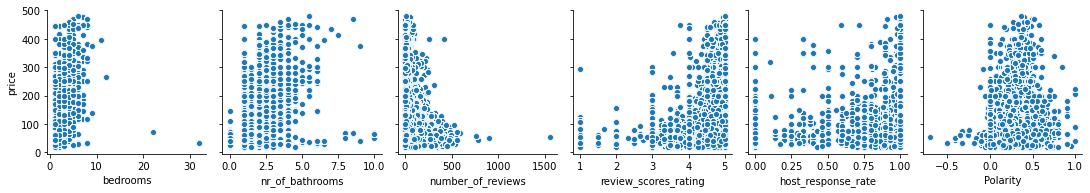

In [125]:
sns.pairplot(data, x_vars=["bedrooms", "nr_of_bathrooms", "number_of_reviews", "review_scores_rating", "host_response_rate",
                           "Polarity"], y_vars=["price"], kind="scatter")

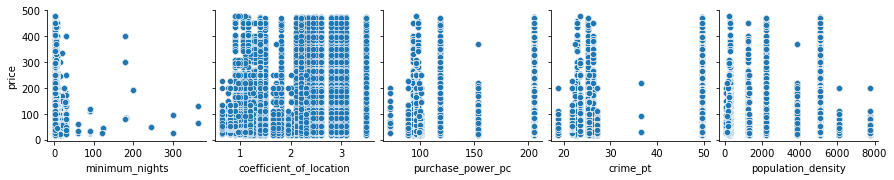

In [12]:
sns.pairplot(data, x_vars=["minimum_nights","coefficient_of_location", "purchase_power_pc", "crime_pt", "population_density"], y_vars=["price"], kind="scatter")

In [13]:
x1 = sm.add_constant(x)
model = sm.OLS(y, x1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        16:10:56   Log-Likelihood:            -1.0281e+06
No. Observations:              196740   AIC:                         2.056e+06
Df Residuals:                  196728   BIC:                         2.056e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -15.5014      1.732     -8.948      0.000     -18.897     -12.106
number_of_reviews          -0.0446      0.001    -36.394      0.000      -0.047      -0.042
coefficient_of_location     0.5074      0.193      2.630      0.009       0.129       0.886
nr_of_bathrooms            11.8157      0.134     88.120      0.000      11.553      12.079
bedrooms                   25.7310      0.106    243.827      0.000      25.524      25.938
review_scores_rating        8.4710      0.277     30.606      0.000       7.929       9.013
purchase_power_pc           0.0893      0.025      3.602      0.000       0.041       0.138
crime_pt                   -0.0561      0.097     -0.576      0.565      -0.247       0.135
population_density         -0.0024      0.000     -8.379      0.000      -0.003      -0.002
host_response_rate        -21.4679      0.745    -28.799      0.000     -22.929     -20.007
minimum_nights              0.0901      0.010      9.159      0.000       0.071       0.109
Polarity                   55.9445      0.968     57.785      0.000      54.047      57.842
==============================================================================
Omnibus:                    89451.439   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5352637.118
Skew:                           1.390   Prob(JB):                         0.00
Kurtosis:                      28.401   Cond. No.                     8.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

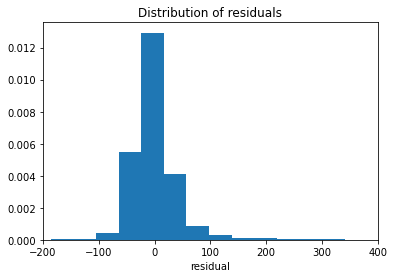

In [12]:
fig, ax = plt.subplots()
# plot the residuals
plt.hist(result.resid, bins = 30, density = True)
ax.set(title="Distribution of residuals", xlabel="residual")
plt.xlim([-200, 400])
plt.show()

In [23]:
# Removing outliers for all variables
# Outliers are defined as values > 3 standard deviations from mean
data = pd.DataFrame(data)
data_out = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data_log = np.log(data_out)

<ipython-input-23-07ec97e115a0>:5: RuntimeWarning: divide by zero encountered in log
  data_log = np.log(data_out)
<ipython-input-23-07ec97e115a0>:5: RuntimeWarning: invalid value encountered in log
  data_log = np.log(data_out)


In [24]:
## Correlation Matrix 
df = pd.DataFrame(data_out)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,number_of_reviews,coefficient_of_location,host_response_rate,population_density,Polarity,nr_of_bathrooms,bedrooms,review_scores_rating,purchase_power_pc,minimum_nights,crime_pt
price,1.00,-0.07,-0.00,-0.01,0.00,0.20,0.34,0.56,0.18,-0.00,-0.05,0.00
number_of_reviews,-0.07,1.00,-0.00,0.11,0.00,0.10,-0.08,0.02,0.13,0.00,-0.06,-0.00
coefficient_of_location,-0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
host_response_rate,-0.01,0.11,-0.00,1.00,0.00,0.07,-0.00,-0.00,0.10,-0.00,-0.09,-0.00
population_density,0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,1.00,0.00,1.00
Polarity,0.20,0.10,-0.00,0.07,-0.00,1.00,0.06,0.05,0.33,-0.00,-0.03,-0.00
nr_of_bathrooms,0.34,-0.08,-0.00,-0.00,-0.00,0.06,1.00,0.41,-0.01,-0.00,-0.02,-0.00
bedrooms,0.56,0.02,-0.00,-0.00,-0.00,0.05,0.41,1.00,0.07,0.00,0.01,0.00
review_scores_rating,0.18,0.13,-0.00,0.10,0.00,0.33,-0.01,0.07,1.00,0.00,0.04,0.00
purchase_power_pc,-0.00,0.00,0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,1.00,-0.00,1.00


In [25]:
#Improving the original regression model
y = (data_log['price']) #target variable
x = data_out[['bedrooms','review_scores_rating', "Polarity", "nr_of_bathrooms"]] #predictors

# splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

#fitting the model to the training data
model = lm.LinearRegression()
model.fit(x_train, y_train)


#predicting y values
y_pred = model.predict(x_test)

# Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)

#Coefficient of Determination
R2 = r2_score(y_test,y_pred)


print("The new R2: ", R2)
print("The model intercept: ", model.intercept_)
print("The model coefficients: ", model.coef_)
print("The new MSE: ", MSE)

The new R2:  0.3240934290865436
The model intercept:  2.547213070908683
The model coefficients:  [0.3401686  0.19205384 0.70659618 0.00280967]
The new MSE:  0.1640948227268744
